# Results
In this notebook, we define and calculate the statistics of our tests.

In [87]:
# load gold standard

import json
import pandas as pd
fileName = "GS.json"
goldStandard = {}

with open(fileName,'r',encoding='utf-8') as file:
    data = json.load(file)
    goldStandardRaw = {id: case["gs"] for id, case in data.items()}

for caseId, case in goldStandardRaw.items():
    goldStandard[caseId] = pd.Series(gs.replace("$","") for gs in case)
    
goldStandard['60']


0    endometriosis
1      adenomyosis
dtype: object

In [88]:
# load results

import json
import pandas as pd
from collections import defaultdict
# fileName = "CaseReviewTest-2021-11-09 (2).json"
fileName = "experiments/experiments.json"
results = {}

with open(fileName, 'r', encoding='utf-8') as file:
    data = json.load(file)
    resultsCollected = defaultdict(lambda: dict())
    for test in data:
        resultsCollected[test["case_number"]][test["app"]] = \
            [result.strip().lower() for result in test["content"].split(";")]

    resultsNormalized = defaultdict(lambda: {})
    for caseId, result in resultsCollected.items():
        maxSize = max(len(ddx) for ddx in result.values())
        for app, ddx in result.items():
            resultsNormalized[caseId][app] = ddx + \
                [None] * (maxSize - len(ddx))

for caseId, case in resultsNormalized.items():
    results[caseId] = pd.DataFrame(case, columns=sorted(case.keys()))

list(results.items())[0]


('10',
                   AveyNormal              ConfidenceAge  \
 0         acute appendicitis         acute appendicitis   
 1             diverticulitis  acute mesenteric ischemia   
 2  acute mesenteric ischemia             diverticulitis   
 3        acute cholecystitis        acute cholecystitis   
 4          acute cholangitis          acute cholangitis   
 5                       None                       None   
 
   SortConfidenceAgeConfMoreThan1  SortConfidenceAgeTop6Prob  \
 0             acute appendicitis         acute appendicitis   
 1      acute mesenteric ischemia  acute mesenteric ischemia   
 2                 diverticulitis             diverticulitis   
 3            acute cholecystitis        acute cholecystitis   
 4              acute cholangitis          acute cholangitis   
 5                           None   irritable bowel syndrome   
 
   SortConfidenceAgeTop6ProbAndConf SortConfidenceAgeTop6ProbOrConf  
 0               acute appendicitis              ac

In [89]:
results['13']

,AveyNormal,ConfidenceAge,SortConfidenceAgeConfMoreThan1,SortConfidenceAgeTop6Prob,SortConfidenceAgeTop6ProbAndConf,SortConfidenceAgeTop6ProbOrConf
0,chronic obstructive pulmonary disease,chronic obstructive pulmonary disease,chronic obstructive pulmonary disease,chronic obstructive pulmonary disease,chronic obstructive pulmonary disease,chronic obstructive pulmonary disease
1,asthma,asthma,asthma,asthma,asthma,asthma
2,valvular heart disease,tuberculosis,tuberculosis,tuberculosis,tuberculosis,tuberculosis
3,tuberculosis,valvular heart disease,valvular heart disease,valvular heart disease,valvular heart disease,valvular heart disease
4,cardiac tamponade,lung cancer,lung cancer,lung cancer,None,lung cancer
5,lung cancer,pneumonia,pneumonia,cardiac tamponade,None,pneumonia
6,None,None,cardiac tamponade,None,None,None
7,None,None,pneumothorax,None,None,None
8,None,None,pulmonary edema,None,None,None
9,None,None,foreign body aspiration,None,None,None


In [90]:
# append cold standard to case
cases = dict()
for caseId, gs in goldStandard.items():
    if caseId in results:
        cases[caseId] = pd.DataFrame(results[caseId])
        cases[caseId].insert(loc=0, column="gs", value=gs)


In [91]:
cases['89']

,gs,AveyNormal,ConfidenceAge,SortConfidenceAgeConfMoreThan1,SortConfidenceAgeTop6Prob,SortConfidenceAgeTop6ProbAndConf,SortConfidenceAgeTop6ProbOrConf
0,otitis media,otitis media,otitis media,otitis media,otitis media,otitis media,otitis media
1,otitis media with effusion,otitis media with effusion,otitis media with effusion,otitis media with effusion,otitis media with effusion,otitis media with effusion,otitis media with effusion
2,otitis externa,otitis media with tympanic membrane perforated,otitis media with tympanic membrane perforated,otitis media with tympanic membrane perforated,otitis media with tympanic membrane perforated,otitis media with tympanic membrane perforated,otitis media with tympanic membrane perforated
3,NaN,tonsillopharyngitis,tonsillopharyngitis,tonsillopharyngitis,tonsillopharyngitis,tonsillopharyngitis,tonsillopharyngitis
4,NaN,None,None,None,earwax blockage,earwax blockage,earwax blockage
5,NaN,None,None,None,otitis externa,otitis externa,otitis externa


## Let us define the metrics now.

### Terms used
- TP: True positive
- TN: True negative
- FP: False positive
- FN: False negative

### Precision
$$precision = \frac{TP}{TP + FP} = \frac{TP}{\text{length of differential list}}$$

### Recall
$$recall = \frac{TP}{TP + FN} = \frac{TP}{\text{length of the gold standard}}$$

### F1 Score
Suppose $\beta$ defines how important is $recall$ to $precision$ then,
$$fscore_{\beta} = (1 + \beta^2)\frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}$$
Substituting $\beta = 1$,
$$fscore_{1} = \frac{2 \cdot precision \cdot recall}{ precision + recall}$$

### NDCG
NDCG or Normalized Discounted Cumulative Gain is measure of how accurate the ranking is. In our calculations, we use
$$DCG = \sum_{i=1}^n\frac{2^{relevance_i}-1}{log_2(i+1)}$$
where $n$ is the number of differentials in the returned list and  
$relevance_i = |gold standard| - rank_{gold\ standard}(ddx[i])$ if $ddx[i]$ is present, 0 otherwise.

$$NDCG = \frac{DCG_{ddx}}{DCG_{gold\ standard}}$$

### M Score
M Score determines where the top disease (gold standard) appears in the returned differential.
$$M_i = \text{gold standard[0]} \in \text{ddx[:i]}$$

### Position
Shows the position of the gold standard[0] in the returned differential. 

### Length
$$length = \frac{|ddx|}{|gold\ standard|}$$


In [92]:
import math


def getPrecision(goldStandard: pd.Series, candidate: pd.Series) -> float:
    tp = sum(int(disease in goldStandard.values and disease is not None)
             for disease in candidate)
    return tp if tp == 0 else tp/candidate.count()


def getRecall(goldStandard: pd.Series, candidate: pd.Series) -> float:
    tp = sum(int(disease in goldStandard.values and disease is not None)
             for disease in candidate)
    return tp/goldStandard.count()


def getF1Score(precision: float, recall: float) -> float:
    return math.nan if precision+recall == 0 else 2*precision*recall/(precision+recall)


def getNDCG(goldStandard: pd.Series, candidate: pd.Series, scores) -> float:
    def discount(score: float, index: int) -> float:
        return (math.pow(2, score)-1)/math.log2(index+1)
        # return (math.pow(2,score)-1)/math.log2(index+1)

    maxDCG = sum(discount(scores[i], i+1) for i in range(len(scores)))

    candidateRelevance = []
    for index, disease in enumerate(candidate):
        goldStandard = list(goldStandard)
        if disease is not None and disease in goldStandard:
            candidateRelevance.append(
                discount(scores[goldStandard.index(disease)], index+1))
        else:
            candidateRelevance.append(0)

    return sum(candidateRelevance)/maxDCG


def getMScore(goldStandard: pd.Series, candidate: pd.Series, m=1) -> bool:
    return goldStandard.values[0] in candidate.values[:m]


def getPosition(goldStandard: pd.Series, candidate: pd.Series) -> bool:
    return math.nan if goldStandard.values[0] not in candidate.values else 1 + list(candidate.values).index(goldStandard.values[0])


def getLength(goldStandard: pd.Series, candidate: pd.Series) -> int:
    return math.nan if candidate.count() == 0 else candidate.count()/goldStandard.count()


def getScoresCase(case: pd.DataFrame) -> pd.DataFrame:
    scores = [
        [getPrecision(case.iloc[:, 0], case.iloc[:, i])
         for i in range(1, len(case.columns))],
        [getRecall(case.iloc[:, 0], case.iloc[:, i])
         for i in range(1, len(case.columns))]
    ]

    scores.append([getF1Score(scores[0][i], scores[1][i])
                  for i in range(len(case.columns)-1)])
    scores.append([getNDCG(case.iloc[:, 0], case.iloc[:, i], list(range(case.iloc[:, 0].count(), 0, -1)))
                  for i in range(1, len(case.columns))])

    for m in range(1, 6, 2):
        scores.append([getMScore(case.iloc[:, 0], case.iloc[:, i], m)
                      for i in range(1, len(case.columns))])

    scores.append([getPosition(case.iloc[:, 0], case.iloc[:, i])
                   for i in range(1, len(case.columns))])

    scores.append([getLength(case.iloc[:, 0], case.iloc[:, i])
                   for i in range(1, len(case.columns))])

    return pd.DataFrame(scores, columns=case.columns[1:],
                        index=["precision", "recall", "f1-score", "NDCG", "M1", "M3", "M5", "position", "length"])


# calculate all scores
scores = {id: getScoresCase(case) for id, case in cases.items()}
scores

recall = sorted([(id,c.loc["recall","AveyNormal"]) for id, c in scores.items() ],key=lambda x : x[1])
recall


[('176', 0.0),
 ('118', 0.0),
 ('64', 0.0),
 ('185', 0.25),
 ('162', 0.3333333333333333),
 ('112', 0.3333333333333333),
 ('105', 0.3333333333333333),
 ('37', 0.3333333333333333),
 ('25', 0.3333333333333333),
 ('104', 0.4),
 ('13', 0.4),
 ('5', 0.4),
 ('199', 0.5),
 ('197', 0.5),
 ('191', 0.5),
 ('184', 0.5),
 ('179', 0.5),
 ('172', 0.5),
 ('165', 0.5),
 ('163', 0.5),
 ('161', 0.5),
 ('138', 0.5),
 ('129', 0.5),
 ('122', 0.5),
 ('115', 0.5),
 ('73', 0.5),
 ('53', 0.5),
 ('52', 0.5),
 ('49', 0.5),
 ('47', 0.5),
 ('45', 0.5),
 ('44', 0.5),
 ('10', 0.5),
 ('4', 0.5),
 ('200', 0.6666666666666666),
 ('198', 0.6666666666666666),
 ('196', 0.6666666666666666),
 ('195', 0.6666666666666666),
 ('192', 0.6666666666666666),
 ('186', 0.6666666666666666),
 ('183', 0.6666666666666666),
 ('181', 0.6666666666666666),
 ('178', 0.6666666666666666),
 ('173', 0.6666666666666666),
 ('142', 0.6666666666666666),
 ('126', 0.6666666666666666),
 ('103', 0.6666666666666666),
 ('89', 0.6666666666666666),
 ('87', 0.6

In [93]:
def getAverage(scores, row: int, col: int) -> float:
    values = []
    for id, score in scores.items():
        if not math.isnan(score.iloc[row, col]):
            values.append(score.iloc[row, col])

    return 0 if not values else round(sum(values)/len(values), 3)


averageScores = pd.DataFrame(
    [
        [
            getAverage(scores, row, col)
            for col in range(len(next(iter(scores.values())).columns))
        ]
        for row in range(9)
    ],
    columns=next(iter(scores.values())).columns,
    index=[
        f"average_{x}" for x in [
            "precision", "recall", "f1-score", "NDCG", "M1", "M3", "M5", "position", "length"
        ]
    ]
)

#ignore nan for recall
for col in next(iter(scores.values())).columns:
    p = averageScores.loc["average_precision", col]
    r = averageScores.loc["average_recall", col]
    averageScores.loc["average_f1-score", col] = round(2*p*r/(p+r), 3)

averageScores


,AveyNormal,ConfidenceAge,SortConfidenceAgeConfMoreThan1,SortConfidenceAgeTop6Prob,SortConfidenceAgeTop6ProbAndConf,SortConfidenceAgeTop6ProbOrConf
average_precision,0.420,0.414,0.367,0.329,0.379,0.337
average_recall,0.677,0.668,0.722,0.696,0.659,0.715
average_f1-score,0.518,0.511,0.487,0.447,0.481,0.458
average_NDCG,0.769,0.769,0.780,0.778,0.766,0.781
average_M1,0.738,0.714,0.714,0.714,0.714,0.714
average_M3,0.929,0.929,0.929,0.929,0.929,0.929
average_M5,0.940,0.940,0.940,0.952,0.940,0.940
average_position,1.350,1.363,1.363,1.407,1.363,1.363
average_length,1.929,1.929,2.935,2.367,1.874,2.367


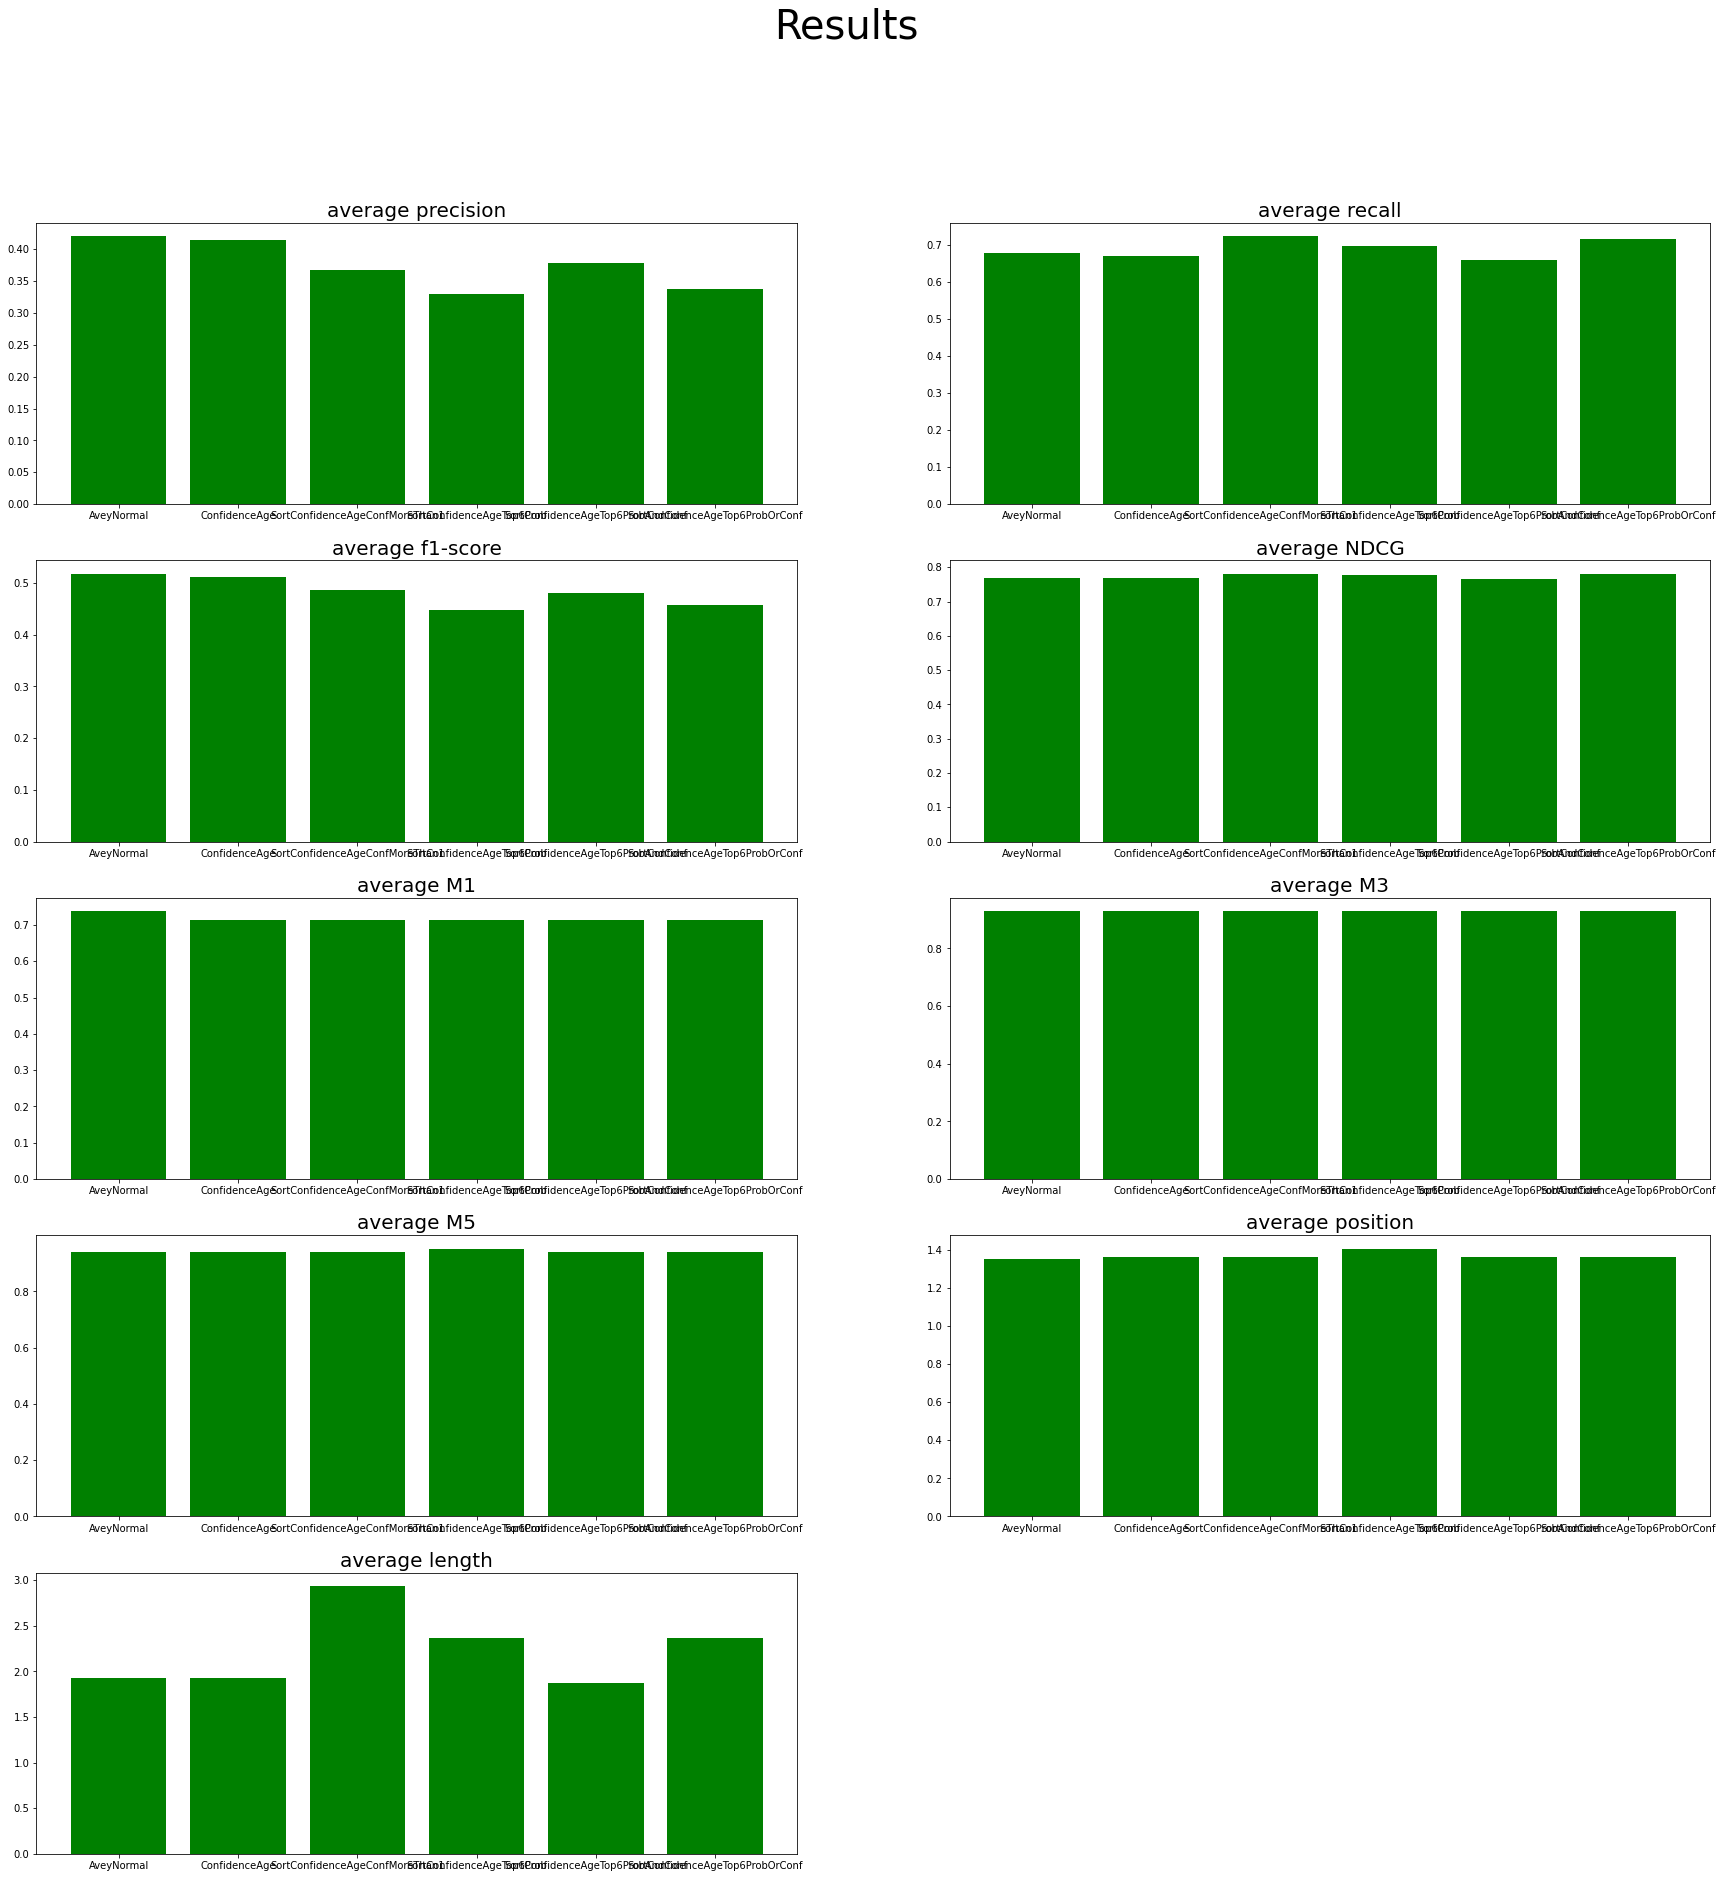

In [94]:
import matplotlib.pyplot as plt
import math

scoresToCompare = pd.DataFrame(averageScores,columns=averageScores.columns)

fig, subplots = plt.subplots(5,2, figsize=(30,30))
fig.suptitle("Results",fontsize=40)

for index, metric in enumerate(scoresToCompare.index.values.tolist()):
    subplots[index//2, index %
             2].bar(scoresToCompare.columns, averageScores.loc[metric],color="green")
    subplots[index//2, index % 2].set_title(metric.replace("_"," "),fontsize=20)


fig.delaxes(subplots[4,1])
plt.show()
